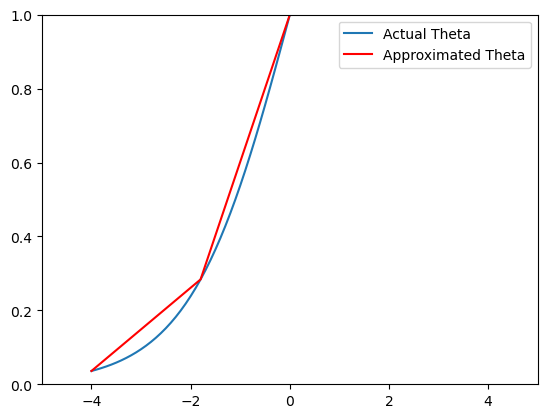

{'w_cut': array([-1.8,  1.8]), 'diff': 0.06417389603832957, 'coef': array([0.11260441, 0.48639007, 0.39794326, 1.        , 0.11260441,
       1.51360993])}
Time elapsed: 0.07254624366760254


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time

def theta(w, c):
    return (np.exp(w) * c) / ((1 + np.exp(w)))

def linear_evaluate(x, a, b):
    return a * x + b

def linear_approximate(c, diag_plot=True):
    w = np.arange(-40, 41) / 10
    actual_theta = theta(w, c)
    No_w = len(w)
    diff = np.zeros((No_w - 3) * (No_w - 2) // 2)
    coef = np.zeros(((No_w - 3) * (No_w - 2) // 2, 6))
    w_cut = np.zeros(((No_w - 3) * (No_w - 2) // 2, 2))
    k = 1
    approximated_theta = []

    for i in range(1, len(w) - 2):
        for j in range(i + 1, len(w) - 1):
            w_cut[k - 1, :] = [w[i], w[j]]
            coef[k - 1, 0] = (actual_theta[i] - actual_theta[0]) / (w[i] - w[0])
            coef[k - 1, 1] = actual_theta[0] - w[0] * coef[k - 1, 0]
            coef[k - 1, 2] = (actual_theta[j] - actual_theta[i]) / (w[j] - w[i])
            coef[k - 1, 3] = actual_theta[i] - w[i] * coef[k - 1, 2]
            coef[k - 1, 4] = (actual_theta[No_w - 1] - actual_theta[j]) / (w[No_w - 1] - w[j])
            coef[k - 1, 5] = actual_theta[No_w - 1] - w[No_w - 1] * coef[k - 1, 4]
            approximated_theta.append(np.concatenate([
                linear_evaluate(w[:i + 1], coef[k - 1, 0], coef[k - 1, 1]),
                linear_evaluate(w[i + 1:j + 1], coef[k - 1, 2], coef[k - 1, 3]),
                linear_evaluate(w[j + 1:], coef[k - 1, 4], coef[k - 1, 5])
            ]))
            diff[k - 1] = np.max(np.abs(actual_theta - approximated_theta[-1]))
            k += 1

    K = np.argmin(diff)
    if diag_plot:
        plt.plot(w, actual_theta, label='Actual Theta')
        plt.plot(w, approximated_theta[K], label='Approximated Theta', color='red')
        plt.ylim(0, 1)
        plt.xlim(-5, 5)
        plt.legend()
        plt.show()

    return {'w_cut': w_cut[K, :], 'diff': diff[K], 'coef': coef[K, :]}

# Example usage
start_time = time.time()

c = 2.0
purity = 0.5
result = linear_approximate(c)
print(result)
end_time = time.time()
print('Time elapsed:', end_time - start_time)

In [55]:
w = [-4, -1.8, 1.8, 4]
actual_theta = theta(w, c)

b_1 = (actual_theta[1] - actual_theta[0]) / (w[1] - w[0])
a_1 = actual_theta[0] - w[0] * b_1
b_2 = (actual_theta[2] - actual_theta[1]) / (w[2] - w[1])
a_2 = actual_theta[1] - w[1] * b_2
b_3 = (actual_theta[3] - actual_theta[2]) / (w[3] - w[2])
a_3 = actual_theta[2] - w[2] * b_3

res =  {
    'w_cut': [-1.8, 1.8],
    'coef': [b_1, a_1, b_2, a_2, b_3, a_3],
}
res

{'w_cut': [-1.8, 1.8],
 'coef': [0.11260441358036022,
  0.48639007424562397,
  0.39794326122168017,
  1.0,
  0.11260441358036025,
  1.513609925754376]}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def theta(w, bv, cv, cn, purity):
    return (np.exp(w) * bv) / ((1 + np.exp(w)) * cn * (1 - purity) + (1 + np.exp(w)) * cv * purity)

def linear_evaluate(x, a, b):
    return a * x + b

def linear_approximate(bv, cv, cn, purity, diag_plot=True):
    w = np.arange(-40, 41) / 10
    
    # Measure time for actual_theta computation
    start_time = time.time()
    actual_theta = theta(w, bv, cv, cn, purity)
    actual_theta_time = time.time() - start_time
    
    No_w = len(w)
    diff = np.zeros(No_w //2  - 1)
    coef = np.zeros((No_w //2  - 1, 6))
    w_cut = np.zeros((No_w //2  - 1, 2))
    k = 1
    approximated_theta = []

    # Measure time for approximated_theta computation
    start_time = time.time()
    for i in range(1, No_w //2):
        j = No_w - 1 - i
        w_cut[k - 1, :] = [w[i], w[j]]
        coef[k - 1, 0] = (actual_theta[i] - actual_theta[0]) / (w[i] - w[0])
        coef[k - 1, 1] = actual_theta[0] - w[0] * coef[k - 1, 0]
        coef[k - 1, 2] = (actual_theta[j] - actual_theta[i]) / (w[j] - w[i])
        coef[k - 1, 3] = actual_theta[i] - w[i] * coef[k - 1, 2]
        coef[k - 1, 4] = (actual_theta[No_w - 1] - actual_theta[j]) / (w[No_w - 1] - w[j])
        coef[k - 1, 5] = actual_theta[No_w - 1] - w[No_w - 1] * coef[k - 1, 4]
        approximated_theta.append(np.concatenate([
            linear_evaluate(w[:i + 1], coef[k - 1, 0], coef[k - 1, 1]),
            linear_evaluate(w[i + 1:j + 1], coef[k - 1, 2], coef[k - 1, 3]),
            linear_evaluate(w[j + 1:], coef[k - 1, 4], coef[k - 1, 5])
        ]))
        diff[k - 1] = np.max(np.abs(actual_theta - approximated_theta[-1]))
        k += 1
    approximated_theta_time = time.time() - start_time

    K = np.argmin(diff)
    if diag_plot:
        plt.plot(w, actual_theta, label='Actual Theta')
        plt.plot(w, approximated_theta[K], label='Approximated Theta', color='red')
        plt.ylim(0, 1)
        plt.xlim(-5, 5)
        plt.legend()
        plt.show()

    return {
        'w_cut': w_cut[K, :],
        'diff': diff[K],
        'coef': coef[K, :],
        'actual_theta_time': actual_theta_time,
    }

# Example usage
bv = [1 + i for i in range(10)]
cv = [i for i in range(10)]
cn = 2.0
purity = [0.4 + 0.05 *i for i in range(10)]

for i in range(10):
    for j in range(10):
        for k in range(10):
            result = linear_approximate(bv[i], cv[j], cn, purity[k], False)
            print(result)



{'w_cut': array([-1.8,  1.8]), 'diff': 0.02673912334930406, 'coef': array([0.04691851, 0.20266253, 0.16580969, 0.41666667, 0.04691851,
       0.6306708 ]), 'actual_theta_time': 0.0003960132598876953}
{'w_cut': array([-1.8,  1.8]), 'diff': 0.029169952744695304, 'coef': array([0.05118382, 0.2210864 , 0.1808833 , 0.45454545, 0.05118382,
       0.68800451]), 'actual_theta_time': 1.621246337890625e-05}
{'w_cut': array([-1.8,  1.8]), 'diff': 0.032086948019164785, 'coef': array([0.05630221, 0.24319504, 0.19897163, 0.5       , 0.05630221,
       0.75680496]), 'actual_theta_time': 9.298324584960938e-06}
{'w_cut': array([-1.8,  1.8]), 'diff': 0.03565216446573871, 'coef': array([0.06255801, 0.27021671, 0.22107959, 0.55555556, 0.06255801,
       0.8408944 ]), 'actual_theta_time': 5.9604644775390625e-06}
{'w_cut': array([-1.8,  1.8]), 'diff': 0.04010868502395604, 'coef': array([0.07037776, 0.3039938 , 0.24871454, 0.625     , 0.07037776,
       0.9460062 ]), 'actual_theta_time': 5.9604644775390625e-

In [6]:
aa = [1, 2, 3,4]
aa[-1]

4

In [7]:
from snv import *


In [8]:
df = pd.read_csv('/Users/yuding/Dropbox/GitHub/Multi_Region_CliPP/multi_clipp_simulation_data/simulation_data_cluster_5_region_1_read_depth_100_replica_2.tsv', sep='\t')
rho = 0.2
omega = 1
n = df.shape[0]
m = 1
max_iteration = 20

get_coef_linear_approximation(get_c_mat(df))

{(0, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.025772649011377324,
  'coef': array([0.04522266, 0.19533738, 0.15981657, 0.40160643, 0.04522266,
         0.60787547])},
 (1, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.01076743222119625,
  'coef': array([0.01889336, 0.08160907, 0.066769  , 0.16778523, 0.01889336,
         0.2539614 ])},
 (2, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.025772649011377324,
  'coef': array([0.04522266, 0.19533738, 0.15981657, 0.40160643, 0.04522266,
         0.60787547])},
 (3, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.016043474009582392,
  'coef': array([0.0281511 , 0.12159752, 0.09948582, 0.25      , 0.0281511 ,
         0.37840248])},
 (4, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.01076743222119625,
  'coef': array([0.01889336, 0.08160907, 0.066769  , 0.16778523, 0.01889336,
         0.2539614 ])},
 (5, 0): {'w_cut': array([-1.8,  1.8]),
  'diff': 0.012886324505688662,
  'coef': array([0.02261133, 0.09766869, 0.07990829, 0.20080321, 

In [4]:
from snv import *
df = pd.read_csv('/Users/yuding/Dropbox/GitHub/Multi_Region_CliPP/multi_clipp_simulation_data/simulation_data_cluster_5_region_1_read_depth_100_replica_2.tsv', sep='\t')
rho = 0.8
omega = 1
n = df.shape[0]
m = 1
max_iteration = 20
gamma = [0.01, 0.03, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
control_large = 5

In [2]:
ray.shutdown()
ray.init(ignore_reinit_error=True)
res0 = [CliPP2.remote(df, rho, gamma[i], omega, n, m, max_iteration) for i in range(len(gamma))]
res0 = ray.get(res0)
ray.shutdown()
res = res0[find_gamma(res0)]

2025-02-17 10:03:57,697	INFO worker.py:1786 -- Started a local Ray instance.


 1 , 1.325P2 pid=59748) 
 18 , 0.08090902884824558 [repeated 182x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
 20 , 0.024242751380819882 [repeated 25x across cluster]


In [3]:
res0

[{'phi': array([[0.54696766],
         [0.08264033],
         [0.54696766],
         [0.08264033],
         [0.54696766],
         [0.54696766],
         [0.08264033],
         [0.08264033],
         [0.54696766],
         [0.08264033],
         [0.08264033],
         [0.54696766],
         [0.34219993],
         [0.08264033],
         [0.08264033],
         [0.08264033],
         [0.34219993],
         [0.34219993],
         [0.34219993],
         [0.08264033],
         [0.08264033],
         [0.34219993],
         [0.08264033],
         [0.08264033],
         [0.34219993],
         [0.34219993],
         [0.08264033],
         [0.54696766],
         [0.54696766],
         [0.08264033],
         [0.08264033],
         [0.08264033],
         [0.54696766],
         [0.08264033],
         [0.34219993],
         [0.54696766],
         [0.34219993],
         [0.34219993],
         [0.08264033],
         [0.08264033],
         [0.08264033],
         [0.08264033],
         [0.34219993],
    

In [5]:
from helper import *
get_file_for_clipp(df)

docker: Error response from daemon: create $(pwd): "$(pwd)" includes invalid characters for a local volume name, only "[a-zA-Z0-9][a-zA-Z0-9_.-]" are allowed. If you intended to pass a host directory, use absolute path.
See 'docker run --help'.


array([[1.]])

In [12]:
A_score = []
for i in range(len(res0)):
    phi_res = res0[i]['phi']
    cp_norm = np.linalg.norm(phi_res, axis=1)
    A_score.append((max(cp_norm) - res0[i]['purity']) / res0[i]['purity'])
A_score = np.array(A_score)
if np.any(A_score < 0.05):
    ind1 = np.where(A_score < 0.05)
    ind2 = np.argmin(A_score[ind1])
elif np.all(A_score > 0.01):
    ind2 = np.argmax(A_score)
else:
    raise("Selection Failed")

In [2]:
sets = {i for i in range(n)}
combinations_2 = list(itertools.combinations(sets, 2))
pairs_mapping = {combination: index for index, combination in enumerate(combinations_2)}
pairs_mapping_inverse = {index: combination for index, combination in enumerate(combinations_2)}

# Get matrices
read_mat = get_read_mat(df)
total_read_mat = get_total_read_mat(df)
c_mat = get_c_mat(df)
bb_mat = get_b_mat(df)
tumor_cn_mat = get_tumor_cn_mat(df)
linearApprox = get_linear_approximation(c_mat)
# Initialize variables
#12/12/2024
phi_hat = (read_mat / (total_read_mat * c_mat))
scale_parameter = np.max([1, np.max(phi_hat)])
phi_hat = phi_hat / scale_parameter
phi_hat[phi_hat > sigmoid(control_large)] = sigmoid(control_large)
phi_hat[phi_hat < sigmoid(-control_large)] = sigmoid(-control_large)
p = inverse_sigmoid(phi_hat)
p[p > control_large] = control_large
p[p < -control_large] = -control_large
p = p.reshape([n * m])
v = np.zeros([len(combinations_2) * m])
for i in range(len(combinations_2)):
    pair = combinations_2[i]
    index_v = pairs_mapping[pair]
    start_v = index_v * m
    end_v = (index_v + 1) * m
    l1, l2 = pairs_mapping_inverse[index_v]
    a_mat = a_mat_generator(l1, l2, n, m)
    v[start_v: end_v] = matmul_by_torch(a_mat, p)
    
y = np.ones([len(combinations_2) * m])
omega = 1
k = 0
# obj_values = []
Flag = True


In [3]:
control_large = 5
wcut = np.array(linearApprox[0])
coef = np.array(linearApprox[1])

In [4]:
def ST(x, lam):
	val = np.abs(x) - lam
	val = np.sign(x)*(val > 0) * val
	return val

def get_DELTA(No_mutation):
    col_id = np.append(np.array(range(int(No_mutation * (No_mutation - 1) / 2))),
                        np.array(range(int(No_mutation * (No_mutation - 1) / 2))))
    row1 = np.zeros(int(No_mutation * (No_mutation - 1) / 2))
    row2 = np.zeros(int(No_mutation * (No_mutation - 1) / 2))
    starting = 0
    for i in range(No_mutation - 1):
        row1[starting:(starting + No_mutation - i - 1)] = i
        row2[starting:(starting + No_mutation - i - 1)] = np.array(range(No_mutation))[(i + 1):]
        starting = starting + No_mutation - i - 1
    row_id = np.append(row1, row2)
    vals = np.append(np.ones(int(No_mutation * (No_mutation - 1) / 2)),
                        -np.ones(int(No_mutation * (No_mutation - 1) / 2)))
    DELTA = sp.sparse.coo_matrix((vals, (row_id, col_id)),
                                    shape=(No_mutation, int(No_mutation * (No_mutation - 1) / 2))).tocsr()
    return DELTA

def update_p(p, v, y, n, m, read_mat, total_read_mat, bb_mat, tumor_cn_mat, coef, wcut, combinations_2, pairs_mapping, rho, control_large):
    No_mutation = n * m
    theta_hat = np.reshape(read_mat / total_read_mat, [No_mutation])

    theta = np.exp(p) * np.reshape(bb_mat, [No_mutation]) / (2 + np.exp(p) * np.reshape(tumor_cn_mat, [No_mutation]))

    A = np.sqrt(np.reshape(total_read_mat, [No_mutation])) * (
                (p <= wcut[:, 0]) * coef[:, 1] + (p >= wcut[:, 1]) * coef[:, 5] + (p > wcut[:, 0]) * (
                    p < wcut[:, 1]) * coef[:, 3] - theta_hat) / np.sqrt(theta * (1 - theta))
    B = np.sqrt(np.reshape(total_read_mat, [No_mutation])) * (
                (p <= wcut[:, 0]) * coef[:, 0] + (p >= wcut[:, 1]) * coef[:, 4] + (p > wcut[:, 0]) * (
                    p < wcut[:, 1]) * coef[:, 2]) / np.sqrt(theta * (1 - theta))

    linear = rho * get_v_mat(v, y, rho, combinations_2, pairs_mapping, n, m) - (B * A)

    Minv = 1 / (B ** 2 + No_mutation * rho)
    Minv_diag = np.diag(Minv)

    trace_g = -rho * np.sum(Minv)

    Minv_outer = np.outer(Minv,Minv)
    inverted = Minv_diag - (1 / (1 + trace_g) * (-rho) * Minv_outer)
    p_new    = matmul_by_torch(inverted, linear.T)
    p_new = p_new.reshape([No_mutation])
    p_new[p_new > control_large] = control_large
    p_new[p_new < -control_large] = -control_large
    return p_new


In [17]:

p = update_p(p, v, y, n, m, read_mat, total_read_mat, bb_mat, tumor_cn_mat, coef, wcut, combinations_2, pairs_mapping, rho, control_large)
temp = 0
for i in range(len(combinations_2)):
    pair = combinations_2[i]
    index_v = pairs_mapping[pair]
    start_v = index_v * m
    end_v = (index_v + 1) * m
     
    v[start_v: end_v] = update_v_SCAD(index_v, pairs_mapping_inverse, p, y, n, m, rho, omega, gamma)                
    y[start_v: end_v] = update_y(y[start_v: end_v], v[start_v: end_v], i, pairs_mapping_inverse, p, n, m, rho)
    l1, l2 = pairs_mapping_inverse[index_v]
    a_mat = a_mat_generator(l1, l2, n, m)
    temp = max(temp, np.linalg.norm(matmul_by_torch(a_mat, p) - v[start_v: end_v]))
print(temp)
rho = 1.02 * rho


0.008631371595887147


In [35]:
No_mutation = n * m
theta_hat = np.reshape(read_mat / total_read_mat, [No_mutation])

theta = np.exp(p) * np.reshape(bb_mat, [No_mutation]) / (2 + np.exp(p) * np.reshape(tumor_cn_mat, [No_mutation]))

A = np.sqrt(n) * (
            (p <= wcut[:, 0]) * coef[:, 1] + (p >= wcut[:, 1]) * coef[:, 5] + (p > wcut[:, 0]) * (
                p < wcut[:, 1]) * coef[:, 3] - theta_hat) / np.sqrt(theta * (1 - theta))
B = np.sqrt(n) * (
            (p <= wcut[:, 0]) * coef[:, 0] + (p >= wcut[:, 1]) * coef[:, 4] + (p > wcut[:, 0]) * (
                p < wcut[:, 1]) * coef[:, 2]) / np.sqrt(theta * (1 - theta))

linear = rho * get_v_mat(v, y, rho, combinations_2, pairs_mapping, n, m) - (B * A)

Minv = 1 / (B ** 2 + No_mutation * rho)
Minv_diag = np.diag(Minv)

trace_g = -rho * np.sum(Minv)

Minv_outer = np.outer(Minv,Minv)
inverted = Minv_diag - (1 / (1 + trace_g) * (-rho) * Minv_outer)
p_new    = matmul_by_torch(inverted, linear.T)
p_new = p_new.reshape([No_mutation])
p_new[p_new > control_large] = control_large
p_new[p_new < -control_large] = -control_large

In [36]:
np.shape(p_new)

(100,)

In [55]:
p

array([-0.6447069 , -1.50108639, -0.28281695, -1.52817719, -0.85757495,
       -0.67608286, -1.4175822 , -1.29008699, -0.89565598, -1.50758201,
       -1.53342131, -0.97106742, -1.0551068 , -1.50590263, -1.29648213,
       -1.53306057, -0.93030373, -1.03442758, -0.99836604, -1.65949168,
       -1.48120748, -1.03869434, -1.77157374, -1.52583825, -0.96143874,
       -1.21983313, -1.43666301, -0.91469053, -0.84580032, -1.50927799,
       -1.50746599, -1.50824054, -0.63945276, -1.50918302, -0.98001164,
       -0.71530002, -0.97387159, -1.23548266, -1.82030839, -1.51428849,
       -1.27320607, -1.51121084, -1.03732984, -1.01785386, -0.9660869 ,
       -1.50407557, -1.51488052, -1.28037802, -0.93841256, -1.51217238,
       -0.6718954 , -0.67704486, -1.03880689, -0.94860774, -1.05175588,
       -0.9111333 , -1.50126895, -0.75154975, -0.32186267, -0.67576435,
       -0.90576484, -1.12295871, -1.22248601, -1.23723654, -0.9997044 ,
       -0.97808478, -0.71020313, -0.75028135, -1.39473585, -1.42

In [56]:
np.log(0.5)

-0.6931471805599453

In [42]:
n,m 

(100, 1)

In [76]:
r = read_mat.reshape([No_mutation])
n = total_read_mat.reshape([No_mutation])
minor = bb_mat.reshape([No_mutation])
total = tumor_cn_mat.reshape([No_mutation])
tau_new = v
tau_new = tau_new.reshape([int(No_mutation * (No_mutation - 1) / 2), 1])
eta_new = y

DELTA = get_DELTA(No_mutation)

In [ ]:
update_p(p, tau_new, eta_new, r, n, minor, total, DELTA,  alpha, coef, wcut)


matrix([[ 0.01133641],
        [-0.1046468 ],
        [ 0.04177548],
        [-0.19205308],
        [-0.04646712],
        [-0.05504674],
        [-0.20056693],
        [-0.18650339],
        [-0.15347111],
        [-0.27937204],
        [-0.28574398],
        [-0.21057943],
        [-0.2660412 ],
        [-0.34030646],
        [-0.32231462],
        [-0.39405166],
        [-0.31313154],
        [-0.3691363 ],
        [-0.3714665 ],
        [-0.51298963],
        [-0.49324817],
        [-0.43790555],
        [-0.53866117],
        [-0.56460565],
        [-0.48426598],
        [-0.539726  ],
        [-0.58627863],
        [-0.49393709],
        [-0.52140812],
        [-0.6661984 ],
        [-0.67678809],
        [-0.6903398 ],
        [-0.56855337],
        [-0.73493513],
        [-0.66566997],
        [-0.6226081 ],
        [-0.70082015],
        [-0.76156259],
        [-0.86144973],
        [-0.8661167 ],
        [-0.82024241],
        [-0.87869702],
        [-0.83201844],
        [-0

In [15]:
from snv import *
from helper import *
df = create_df_from_clipp('sample_snv.txt', 'sample_cna.txt', 'sample_purity.txt')
rho = 0.8
omega = 1
n = df.shape[0]
m = 1
max_iteration = 20
gamma = 0.01
control_large = 5

In [16]:
precision=1e-2
control_large = 5

In [17]:
sets = {i for i in range(n)}
combinations_2 = list(itertools.combinations(sets, 2))
pairs_mapping = {combination: index for index, combination in enumerate(combinations_2)}
pairs_mapping_inverse = {index: combination for index, combination in enumerate(combinations_2)}

# Get matrices
read_mat = get_read_mat(df)
total_read_mat = get_total_read_mat(df)
c_mat = get_c_mat(df)
bb_mat = get_b_mat(df)
tumor_cn_mat = get_tumor_cn_mat(df)
linearApprox = get_linear_approximation(c_mat)
# Initialize variables
#12/12/2024
phi_hat = (read_mat / (total_read_mat * c_mat))
scale_parameter = np.max([1, np.max(phi_hat)])
phi_hat = phi_hat / scale_parameter
phi_hat[phi_hat > sigmoid(control_large)] = sigmoid(control_large)
phi_hat[phi_hat < sigmoid(-control_large)] = sigmoid(-control_large)
p = inverse_sigmoid(phi_hat)
p[p > control_large] = control_large
p[p < -control_large] = -control_large
p = p.reshape([n * m])
v = np.zeros([len(combinations_2) * m])
for i in range(len(combinations_2)):
    pair = combinations_2[i]
    index_v = pairs_mapping[pair]
    start_v = index_v * m
    end_v = (index_v + 1) * m
    l1, l2 = pairs_mapping_inverse[index_v]
    a_mat = a_mat_generator(l1, l2, n, m)
    v[start_v: end_v] = matmul_by_torch(a_mat, p)
    
y = np.ones([len(combinations_2) * m])
omega = np.ones([len(combinations_2)])
k = 0

control_large = 5
wcut = np.array(linearApprox[0])
coef = np.array(linearApprox[1])
temp = 100

In [18]:
p

array([-0.5244211 , -0.40888004, -0.36908957, -0.61139155, -0.51506408,
       -0.36468674, -0.30949509, -0.66454888, -0.51821259, -0.53378282,
       -0.5054016 , -0.38292426, -0.31699921, -0.56866074, -0.51524818,
       -0.39253557, -0.56060656, -0.27865928, -0.46894055, -0.48156405,
       -0.32293774, -0.30807666, -0.49008341, -0.32668467, -0.46843128,
       -0.39015798, -0.52741943, -0.3469523 , -0.40773626, -0.67503409,
        0.0305622 , -0.69095119, -0.49449106, -0.34557836, -0.41881328,
       -0.52429695, -0.41159731,  0.07051576, -0.31185543, -0.25699963,
       -0.33396214, -0.56181616, -0.66335393, -0.25274809, -0.58702694,
       -0.70870058, -0.40291804, -0.48691649, -0.31224424, -0.65513367,
       -0.45558476, -0.4299177 , -0.54404876, -0.31984426, -0.50174483,
       -0.35592723, -0.63800688, -0.38966644, -0.46934094, -0.29722006,
       -0.60536479, -0.33849442, -0.43816825, -0.5499509 , -0.44900876,
       -0.65489848, -0.25856751, -0.30622313, -0.63662084, -0.33

In [7]:
p = update_p(p, v, y, n, m, read_mat, total_read_mat, bb_mat, tumor_cn_mat, coef, wcut, combinations_2, pairs_mapping, rho, control_large)
temp = 0
for i in range(len(combinations_2)):
    pair = combinations_2[i]
    index_v = pairs_mapping[pair]
    start_v = index_v * m
    end_v = (index_v + 1) * m
    v[start_v: end_v] = update_v_SCAD(index_v, pairs_mapping_inverse, p, y, n, m, rho, omega[i], gamma)                
    y[start_v: end_v] = update_y(y[start_v: end_v], v[start_v: end_v], i, pairs_mapping_inverse, p, n, m, rho)
    l1, l2 = pairs_mapping_inverse[index_v]
    a_mat = a_mat_generator(l1, l2, n, m)
    temp = max(temp, np.linalg.norm(matmul_by_torch(a_mat, p) - v[start_v: end_v]))
rho = 1.02 * rho
k = k + 1
if(precision > temp):
    Flag = False

In [8]:
p

array([ 1.18548424,  1.30433414,  1.34012418,  1.08242772,  1.17661463,
        1.33364512,  1.39108094,  1.01253956,  1.15558347,  1.13831757,
        1.16558709,  1.28878649,  1.35520472,  1.08524179,  1.1347917 ,
        1.2685286 ,  1.08495847,  1.37886291,  1.17146165,  1.15883311,
        1.32000016,  1.33522928,  1.13373718,  1.30484407,  1.15306553,
        1.23107659,  1.07740989,  1.26462962,  1.20123589,  0.89943967,
        1.66719437,  0.88404934,  1.08631547,  1.24493395,  1.16482525,
        1.04495891,  1.15987998,  1.64613284,  1.26435591,  1.31847458,
        1.23311736,  0.98169402,  0.86674303,  1.30204516,  0.94287041,
        0.80779717,  1.13738035,  1.03876663,  1.22566623,  0.85243737,
        1.05788034,  1.08275114,  0.95147847,  1.19351449,  0.99769743,
        1.14848453,  0.84109742,  1.10250079,  1.01300031,  1.19604973,
        0.86241298,  1.14367746,  1.03327268,  0.90944246,  1.00794546,
        0.78812629,  1.20963018,  1.15417985,  0.79847886,  1.10

In [5]:
diff = np.zeros((n, n))
class_label = -np.ones(n)
class_label[0] = 0
group_size = [1]
labl = 1
least_mut = 25
for i in range(1, n):
    for j in range(i):
        index_v = pairs_mapping[(j, i)]
        start_v = index_v * m
        end_v = (index_v + 1) * m
        diff[j, i] = np.linalg.norm(v[start_v: end_v]) if np.linalg.norm(v[start_v: end_v]) > 0.05 else 0
        diff[i, j] = diff[j, i]
for i in range(1, n):
    for j in range(i):
        if diff[j, i] == 0:
            class_label[i] = class_label[j]
            group_size[int(class_label[j])] += 1
            break
    if class_label[i] == -1:
        class_label[i] = labl
        labl += 1
        group_size.append(1)
   

In [6]:
# quality control
tmp_size = np.min(np.array(group_size)[np.array(group_size) > 0])
tmp_grp = np.where(group_size == tmp_size)
refine = False
if tmp_size < least_mut:
    refine = True
while refine:
    refine = False
    tmp_col = np.where(class_label == tmp_grp[0][0])[0]
    for i in range(len(tmp_col)):
        if tmp_col[i] != 0 and tmp_col[i] != n - 1:
            tmp_diff = np.abs(np.append(np.append(diff[0:tmp_col[i], tmp_col[i]].T.ravel(), 100),
                                        diff[tmp_col[i], (tmp_col[i] + 1):n].ravel()))
            tmp_diff[tmp_col] += 100
            diff[0:tmp_col[i], tmp_col[i]] = tmp_diff[0:tmp_col[i]]
            diff[tmp_col[i], (tmp_col[i] + 1):n] = tmp_diff[(tmp_col[i] + 1):n]
        elif tmp_col[i] == 0:
            tmp_diff = np.append(100, diff[0, 1:n])
            tmp_diff[tmp_col] += 100
            diff[0, 1:n] = tmp_diff[1:n]
        else:
            tmp_diff = np.append(diff[0:(n - 1), n - 1], 100)
            tmp_diff[tmp_col] += 100
            diff[0:(n - 1), n - 1] = tmp_diff[0:(n - 1)]
        ind = tmp_diff.argmin()
        group_size[class_label.astype(np.int64, copy=False)[tmp_col[i]]] -= 1
        class_label[tmp_col[i]] = class_label[ind]
        group_size[class_label.astype(np.int64, copy=False)[tmp_col[i]]] += 1
    tmp_size = np.min(np.array(group_size)[np.array(group_size) > 0])
    tmp_grp = np.where(group_size == tmp_size)
    refine = False
    if tmp_size < least_mut:
        refine = True
labels = np.unique(class_label)


In [7]:
phi_out = np.zeros((len(labels), m))
for i in range(len(labels)):
    ind = np.where(class_label == labels[i])[0]
    class_label[ind] = i
    phi_out[i, :] = np.sum(phi_hat[ind,: ] * total_read_mat[ind,: ]) / np.sum(total_read_mat[ind, :])

In [16]:

if len(labels) > 1:
    phi_norm = np.linalg.norm(phi_out, axis=1)
    sort_phi = np.sort(phi_norm)
    indices = [np.where(phi_norm == element)[0][0] for element in sort_phi]
    phi_diff = sort_phi[1:] - sort_phi[:-1]
    min_val = phi_diff.min()
    min_ind = phi_diff.argmin()
    while min_val < 0.01:
        combine_ind = np.where(phi_out == sort_phi[indices[min_ind]])[0]
        combine_to_ind = np.where(phi_out == sort_phi[indices[min_ind] + 1])[0]
        class_label[class_label == combine_ind] = combine_to_ind
        labels = np.unique(class_label)
        phi_out = np.zeros(len(labels))
        for i in range(len(labels)):
            ind = np.where(class_label == labels[i])[0]
            class_label[ind] = i
            phi_out[i, :] = np.sum(phi_hat[ind, :] * total_read_mat[ind, :]) / np.sum(total_read_mat[ind, :])
        if len(labels) == 1:
            break
        else:
            phi_norm = np.linalg.norm(phi_out, axis=1)
            sort_phi = np.sort(phi_norm)
            indices = [np.where(phi_norm == element)[0][0] for element in sort_phi]
            phi_diff = sort_phi[1:] - sort_phi[:-1]
            min_val = phi_diff.min()
            min_ind = phi_diff.argmin()
phi_res = np.zeros(n)
for lab in range(len(phi_out)):
    phi_res[class_label == lab] = phi_out[lab]
   

In [17]:
phi_res

array([0.54696766, 0.08264033, 0.54696766, 0.08264033, 0.54696766,
       0.54696766, 0.08264033, 0.08264033, 0.54696766, 0.08264033,
       0.08264033, 0.54696766, 0.34219993, 0.08264033, 0.08264033,
       0.08264033, 0.34219993, 0.34219993, 0.34219993, 0.08264033,
       0.08264033, 0.34219993, 0.08264033, 0.08264033, 0.34219993,
       0.34219993, 0.08264033, 0.54696766, 0.54696766, 0.08264033,
       0.08264033, 0.08264033, 0.54696766, 0.08264033, 0.34219993,
       0.54696766, 0.34219993, 0.34219993, 0.08264033, 0.08264033,
       0.08264033, 0.08264033, 0.34219993, 0.34219993, 0.54696766,
       0.08264033, 0.08264033, 0.08264033, 0.54696766, 0.08264033,
       0.54696766, 0.54696766, 0.34219993, 0.54696766, 0.34219993,
       0.54696766, 0.08264033, 0.54696766, 0.54696766, 0.54696766,
       0.54696766, 0.34219993, 0.34219993, 0.34219993, 0.34219993,
       0.54696766, 0.54696766, 0.54696766, 0.08264033, 0.08264033,
       0.08264033, 0.34219993, 0.34219993, 0.34219993, 0.34219